In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
train_dir = "cifar-10-img/train"
test_dir = "cifar-10-img/test"

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [3]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [5]:
# Load VGG16 without top layers
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

In [6]:
for layer in base_model.layers:
   layer.trainable = False

In [7]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 [==============================] - 16s 198ms/step - loss: 1.0271 - accuracy: 0.6350 - val_loss: 1.3418 - val_accuracy: 0.5370
Epoch 2/10
79/79 [==============================] - 16s 208ms/step - loss: 1.0059 - accuracy: 0.6450 - val_loss: 1.3237 - val_accuracy: 0.5330
Epoch 3/10
79/79 [==============================] - 17s 213ms/step - loss: 0.9579 - accuracy: 0.6594 - val_loss: 1.3415 - val_accuracy: 0.5480
Epoch 4/10
79/79 [==============================] - 16s 204ms/step - loss: 0.9178 - accuracy: 0.6772 - val_loss: 1.3606 - val_accuracy: 0.5290
Epoch 5/10
79/79 [==============================] - 15s 194ms/step - loss: 0.8664 - accuracy: 0.6902 - val_loss: 1.3452 - val_accuracy: 0.5350
Epoch 6/10
79/79 [==============================] - 14s 178ms/step - loss: 0.8347 - accuracy: 0.7048 - val_loss: 1.3698 - val_accuracy: 0.5510
Epoch 7/10
79/79 [==============================] - 15s 192ms/step - loss: 0.8203 - accuracy: 0.7056 - val_loss: 1.3943 - val_accuracy: 0.5260

In [11]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 [==============================] - 68s 817ms/step - loss: 2.0621 - accuracy: 0.1910 - val_loss: 1.7896 - val_accuracy: 0.2610
Epoch 2/10
79/79 [==============================] - 63s 802ms/step - loss: 1.4804 - accuracy: 0.4520 - val_loss: 1.4017 - val_accuracy: 0.4980
Epoch 3/10
79/79 [==============================] - 66s 832ms/step - loss: 1.1334 - accuracy: 0.6036 - val_loss: 1.1640 - val_accuracy: 0.6150
Epoch 4/10
79/79 [==============================] - 64s 814ms/step - loss: 0.9655 - accuracy: 0.6714 - val_loss: 1.1292 - val_accuracy: 0.6220
Epoch 5/10
79/79 [==============================] - 66s 839ms/step - loss: 0.8013 - accuracy: 0.7252 - val_loss: 1.1579 - val_accuracy: 0.6050
Epoch 6/10
79/79 [==============================] - 65s 828ms/step - loss: 0.6832 - accuracy: 0.7682 - val_loss: 1.2017 - val_accuracy: 0.6360
Epoch 7/10
79/79 [==============================] - 68s 861ms/step - loss: 0.5871 - accuracy: 0.7968 - val_loss: 1.3173 - val_accuracy: 0.5970

In [12]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 [==============================] - 4s 108ms/step


In [13]:
labels = list(test_generator.class_indices.keys())

Preditcted:  cat
Actual:  cat


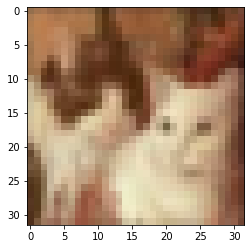

In [14]:
n = 890
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])